# Exploratory Data Analysis On Haberman Dataset

In [65]:
# IMPORTING PACKAGES
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Attribute Information:       
- Age of patient at the time of operation      
- Patient’s year of operation      
- Number of positive axillary nodes detected      
- Survival status :       
  1 = the patient survived 5 years or longer       
  2 = the patient died within 5 years     

### Objective:   
To predict whether a patient will die within 5 years or survive for 5 years or more after the operation.

In [66]:
# Importing file
df=pd.read_csv("haberman.csv",header=None)
df.columns = ['age', 'year', 'axillary_nodes', 'survival_status']
df.head()

,age,year,axillary_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [67]:
print(df.shape)
df.info()

(306, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age                306 non-null int64
year               306 non-null int64
axillary_nodes     306 non-null int64
survival_status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [68]:
# Convert to Categorical
df['survival_status'] = df['survival_status'].map({1:'Yes', 2:'No'})
df.head() 

,age,year,axillary_nodes,survival_status
0,30,64,1,Yes
1,30,62,3,Yes
2,30,65,0,Yes
3,31,59,2,Yes
4,31,65,4,Yes


In [69]:
# Statistics
df.describe()

,age,year,axillary_nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


In [70]:
df["survival_status"].value_counts()

Yes    225
No      81
Name: survival_status, dtype: int64

#### OBSERVATION :     
1. Range of patients age = 30-83 years     
2. Range of year in which patient had undergone surgery = 1958-1969      
3. Range of axillary nodes = 0-52      
4. 75% of the patients have less than 4 positive axillary nodes       
5. 25% of the patients have no positive axillary nodes 
6. Number of patients that survived 5 years or longer = 225
7. Number of patients that died within 5 years = 81

# UNIVARIATE ANALYSIS

## PDF
### 1) Positive Axillary Nodes

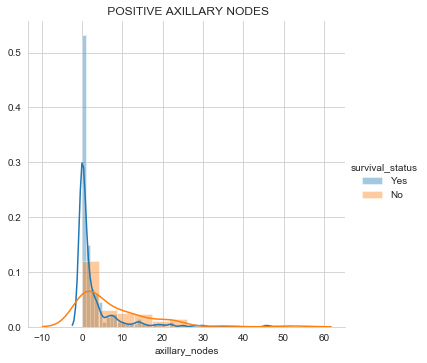

In [71]:
sns.set_style("whitegrid")
sns.FacetGrid(df,hue='survival_status',height=5).map(sns.distplot,'axillary_nodes').add_legend()
plt.title(' POSITIVE AXILLARY NODES')
plt.show()

#### OBSERVATION:
1. Patients with less than 5 nodes are more likely to survive.
2. There are very few chances of surviving if there are 25 or more nodes.

### 2)Patient's Age

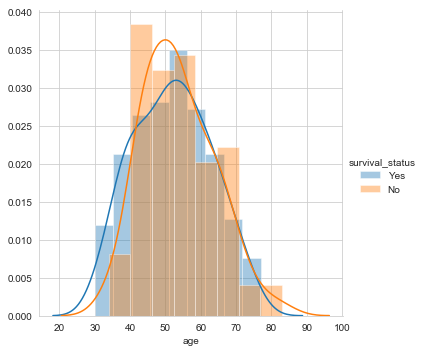

In [72]:
sns.set_style("whitegrid")
sns.FacetGrid(df,hue='survival_status',height=5).map(sns.distplot,"age").add_legend()   

#### OBSERVATION:
1. More number of patients survived for more than 5 years aged between 30-40 years. 
2. More number of patients aged between 40-60 years survived for less than 5 years.

### 3) Year of Operation

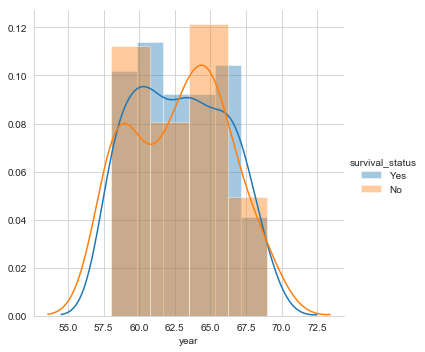

In [73]:
sns.set_style("whitegrid")
sns.FacetGrid(df,hue='survival_status',height=5).map(sns.distplot,"year").add_legend()   

#### OBSERVATION:
1. There is major overlapping observed.This cannot be a parameter to decide the patient’s survival chances.
2. In the years 1960 and 1965 there were more unsuccessful operations.

### BOX PLOT & VIOLIN PLOT

### 1) Positive Axillary Node

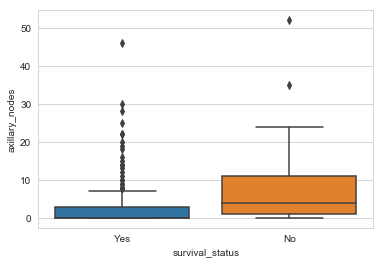

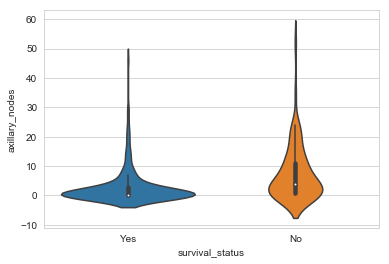

In [74]:
sns.boxplot(x='survival_status',y='axillary_nodes',data=df)
plt.show()

sns.violinplot(x='survival_status',y='axillary_nodes',data=df)
plt.show()

#### OBSERVATION:
1) Class 'Yes' has many outliers and large percentage of patients had 0 nodes.  
2) Class 'No' has a large percentage of patients had more than 0 nodes.      
3) As the number of nodes increase, the patient is more likely to survive for less than 5 years.

### 2) Patient's Age

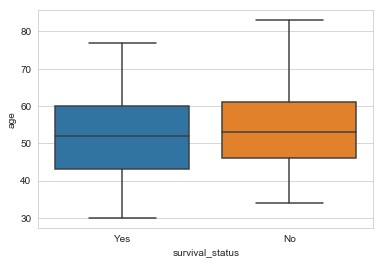

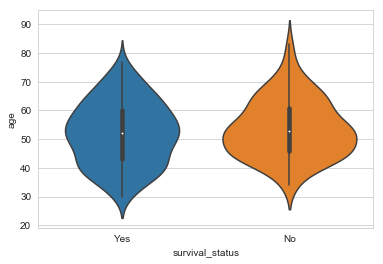

In [75]:
sns.boxplot(x='survival_status',y='age',data=df)
plt.show()

sns.violinplot(x='survival_status',y='age',data=df)
plt.show()

#### OBSERVATION:
1) Huge overlap and thus unble to differentiate the class based on the plots      
2) Patient's age alone is not an important parameter in determining the survival of a patient


### 3) Year of Operation

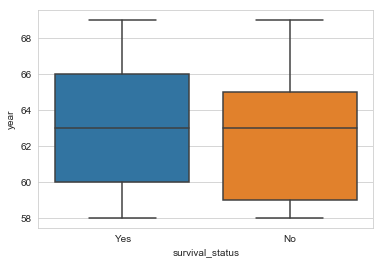

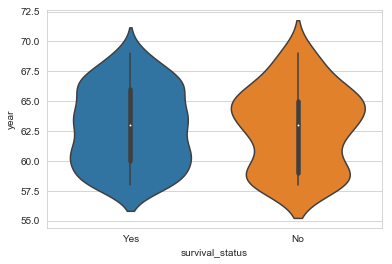

In [76]:
sns.boxplot(x='survival_status',y='year',data=df)
plt.show()

sns.violinplot(x='survival_status',y='year',data=df)
plt.show()

#### OBSERVATION:
1) Huge overlap and thus unable to differentiate the class based on the plots      
2) Year of operation is not an important parameter in determining the survival of a patient

# BIVARIATE ANALYSIS
## PAIR-PLOT

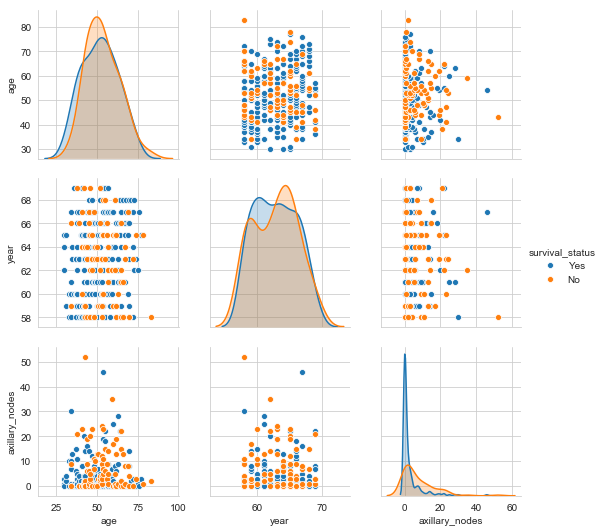

In [77]:
sns.pairplot(df,hue='survival_status')
plt.show()

#### OBSERVATION:
1. Huge overlapping can be observed among the classes.
2. Thus the classes are linearly separable.

### CONCLUSION:
1) Patient’s age and year of operation alone are not deciding factors for the patient's survival.
2) Patients with less number of positive axillary nodes may have higher chances of survival although this may not be true in all cases.
3) People less than 35 years may have more chance of survival.
4) The objective of classifying the survival status of a new patient based on the given features is a difficult task.